# Baixando dados direto do Kaggle


### **1º Abra sua conta no Kaggle**

No seu perfil, clique em "Account", e desça até a seção "API". Caso você já tenha criado tokens, clique em "**Expire API token**". Caso contráio, clique em "**Create new API token**". Ao fazer isso, o arquivo *kaggle.json* será baixado em seu computador.

### **2º Abra o seu projeto no Google Colab**

Em seu notebook, você irá executar os seguintes comandos:



1.   ! pip install -q kaggle
2.   from google.colab import files
3.   files.upload() <- faça o upload do arquivo kaggle.json
4.   ! mkdir ~/.kaggle
5.   ! cp kaggle.json ~/.kaggle/
6.   ! chmod 600 ~/.kaggle/kaggle.json <- mudando permissão do arquivo

Pronto, agora você pode verificar se tudo ocorreu certo executando a seguinte linha de código:

! kaggle datasets list


In [ ]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [ ]:
files.upload()

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d antaresnyc/metagenomics

 82% 65.0M/79.6M [00:03<00:00, 20.0MB/s]
100% 79.6M/79.6M [00:03<00:00, 26.2MB/s]


In [8]:
! unzip metagenomics.zip

Archive:  metagenomics.zip
  inflating: abundance.txt           
  inflating: abundance_stoolsubset.txt  
  inflating: marker_presence.txt     
  inflating: markers2clades_DB.txt   


In [9]:
# criando pasta para adicinar os dados baixados
! mkdir Metagenome_data

In [10]:
# movendo arquivos para pasta
! mv ./*.txt ./Metagenome_data/

# Python

Seção para manipulação do dataframe.

In [16]:
import os
import pandas as pd
import numpy as np
import re
from scipy.stats import norm

import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [17]:
os.chdir('Metagenome_data/')

FileNotFoundError: ignored

In [18]:
def read_csv(file_name: str) -> pd.core.frame.DataFrame:
  '''
    Function to create and process a dataframe.

    Arguments:
    file_name: str. csv filename

    Returns:
    df: pd.core.frame.Dataframe. dataframe
  '''

  df = pd.read_csv(file_name, sep = '\t', dtype = 'unicode')
  df = df.T
  df.columns = df.iloc[0]
  df.drop(['dataset_name'] , axis = 0, inplace = True)
  
  return df

In [19]:
df = read_csv('abundance_stoolsubset.txt')
df.head()

dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,camp,paired_end_insert_size,read_length,total_reads,matched_reads,uniquely_matching_reads,uniquely_matched_reads,gene_number,gene_number_for_11m_uniquely_matched_reads,hitchip_probe_number,bmi,gene_count_class,hitchip_probe_class,#SampleID,rna_sampleid,infant_gender,infant_gestation_weeks,cohort,less_than_29weeks,sample_collection_days,collectionweek,samplecollectionwindow,gut_sample_id_ncbipublic,gut_sample_id_corrected,projectid,flowcell,comment,mlst_project,mlst_ec,st_ec,mlst_kp,...,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda|t__GCF_000023465,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_faecium|t__GCF_000294895,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens|t__Enterococcus_pallens_unclassified,k__Bacteria|p__Planctomycetes,k__Bacteria|p__Planctomycetes|c__Planctomycetia,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii|t__Vibrio_furnissii_unclassified,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_sp_2_2_4,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_sp_2_2_4|t__GCF_000157055,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_fusiformis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_fusiformis|t__Lysinibacillus_fusiformis_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus|t__Lysinibacillus_sphaericus_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobacterium,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobacterium|s__Methanobacterium_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_boronitolerans,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_boronitolerans|t__GCF_000286375,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Staphylococcaceae|g__Staphylococcus|s__Staphylococcus_vitulinus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Staphylococcaceae|g__Staphylococcus|s__Staphylococcus_vitulinus|t__GCF_000286335,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus|s__Bavariicoccus_seileri,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus|s__Bavariicoccus_seileri|t__GCF_00042166

In [20]:
df.shape

(1989, 2338)

In [16]:
columns = df.columns.to_list()

In [18]:
len(columns)

2338

In [21]:
def Find(pattern:str, txt:str) -> str:
  '''
    Função para buscar padrao em string. Se o padrao eh encontrado, retorna padrao.


    Argumentos:
    pattern: str. padrao procurado.
    txt: str. string onde o padrao sera procurado

    Return:
    match.group(): str ou None. Se encontrar padrao, retorna padrao, caso contrario
    None.
  '''

  match = re.search(pattern, txt)

  if match: return match.group()

In [ ]:
# buscando todas as colunas do reino bacteria
column_names = [s for i, s in enumerate(columns) if 'k__Bacteria' in s]

In [ ]:
# buscando apenas as colunas que representam os generos
genero_names = []

# demora um pouquinho

for i in range(len(column_names)):
  aux = Find(r'\w+.\w+.\w+.\w+.\w+.g__\w+$', column_names[i])
  if aux != None:
    genero_names.append(aux)

In [ ]:
genero_names.insert(0, 'disease')

In [ ]:
# recolhendo colunas de interesse
df_genus_disease = df.loc[: , genero_names]

In [ ]:
df_genus_disease.to_csv("df_genus_disease.csv")

In [20]:
df_genus_disease = pd.read_csv('df_genus_disease.csv')
df_genus_disease.head()

,Unnamed: 0,disease,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Adlercreutzia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Atopobium,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Coriobacteriaceae_noname,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Gordonibacter,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Olsenella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Slackia,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidales_noname|g__Bacteroidales_noname,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Barnesiella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Coprobacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Odoribacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Parabacteroides,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Porphyromonas,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Alloprevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Paraprevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes,k__Bacteria|p__Cyanobacteria|c__Cyanobacteria_noname|o__Oscillatoriales|f__Oscillatoriales_noname|g__Microcoleus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Carnobacteriaceae|g__Granulicatella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Leuconostoc,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Weissella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Lactococcus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Clostridium,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Anaerococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Parvimonas,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Peptoniphilus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_noname|g__Clostridiales_noname,...,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Nocardioidaceae|g__Nocardioides,k__Bacteria|p__Proteobac

In [22]:
df_genus_disease.rename(columns = {'Unnamed: 0' : 'dataset_name'}, inplace = True)
df_genus_disease.head()

,dataset_name,disease,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Adlercreutzia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Atopobium,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Coriobacteriaceae_noname,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Gordonibacter,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Olsenella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Slackia,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidales_noname|g__Bacteroidales_noname,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Barnesiella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Coprobacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Odoribacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Parabacteroides,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Porphyromonas,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Alloprevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Paraprevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes,k__Bacteria|p__Cyanobacteria|c__Cyanobacteria_noname|o__Oscillatoriales|f__Oscillatoriales_noname|g__Microcoleus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Carnobacteriaceae|g__Granulicatella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Leuconostoc,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Weissella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Lactococcus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Clostridium,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Anaerococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Parvimonas,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Peptoniphilus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_noname|g__Clostridiales_noname,...,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Nocardioidaceae|g__Nocardioides,k__Bacteria|p__Proteob

In [23]:
df_genus_disease.drop(['dataset_name'], axis = 1, inplace = True)
df_genus_disease.head()

,disease,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Adlercreutzia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Atopobium,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Coriobacteriaceae_noname,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Gordonibacter,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Olsenella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Slackia,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidales_noname|g__Bacteroidales_noname,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Barnesiella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Coprobacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Odoribacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Parabacteroides,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Porphyromonas,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Alloprevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Paraprevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes,k__Bacteria|p__Cyanobacteria|c__Cyanobacteria_noname|o__Oscillatoriales|f__Oscillatoriales_noname|g__Microcoleus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Carnobacteriaceae|g__Granulicatella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Leuconostoc,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Weissella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Lactococcus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Clostridium,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Anaerococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Parvimonas,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Peptoniphilus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_noname|g__Clostridiales_noname,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_noname|g__Flavonifractor,...,k__Bacteria|p__Actinobacteria|c__Actin

In [ ]:
df_genus_disease.columns

In [33]:
df_genus_disease.to_csv("df_individual.csv")

In [34]:
df_genus = df_genus_disease 

In [36]:
df_genus['dataset_name'].value_counts()

t2dmeta_long.125               1
Quin_gut_liver_cirrhosis.74    1
Chatelier_gut_obesity.159      1
Chatelier_gut_obesity.197      1
Neilsen_genome_assembly.337    1
                              ..
Tito_subsistence_gut.10        1
t2dmeta_long.41                1
WT2D.84                        1
Chatelier_gut_obesity.225      1
t2dmeta_short.31               1
Name: dataset_name, Length: 1989, dtype: int64

In [ ]:
df_age = df_subset[(df_subset['age'] != 'nd') & (df_subset['age'] != 'na') & (df_subset['age'] != ' -')]
df_age.head()

dataset_name,disease,age,gender
Candela_Africa,n,40,female
Candela_Africa.1,n,29,female
Candela_Africa.2,n,8,female
Candela_Africa.3,n,34,male
Candela_Africa.4,n,30,male


In [ ]:
age_list = np.asarray(df_age['age'], dtype = 'float')

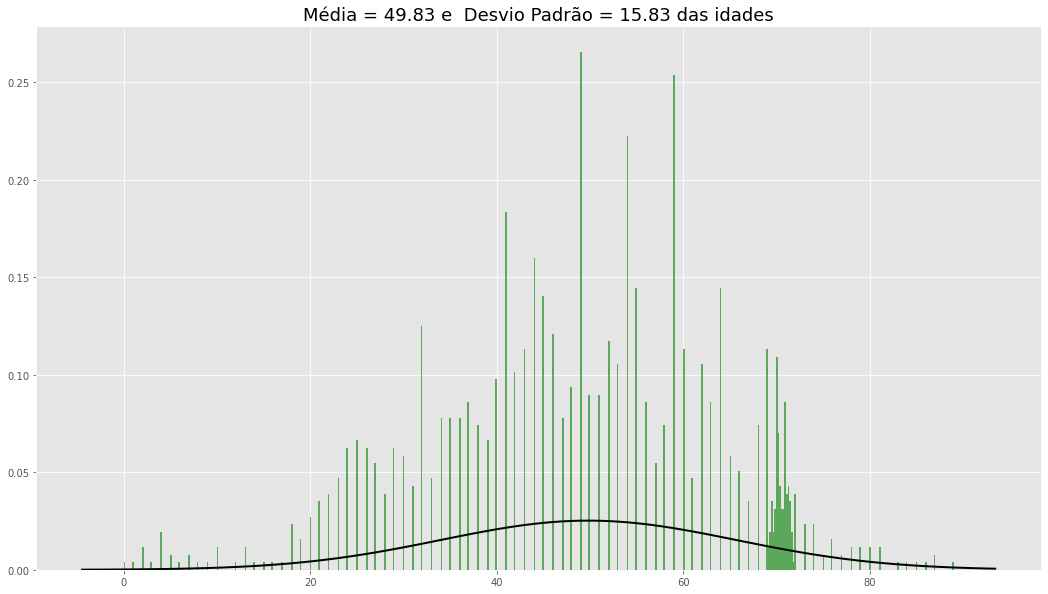

In [ ]:
# modelando nossos dados - encontrando média e desvio padrao
mu, std = norm.fit(age_list)

# plot do histograma
plt.figure(figsize = (18, 10))
plt.hist(age_list, bins = 500, density = True, alpha = 0.6, color='g')

# plot função de densidade de probabilidades
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# parametros graficos
plt.plot(x, p, 'k', linewidth = 2)
title = "Média = %.2f e  Desvio Padrão = %.2f das idades" % (mu, std)
plt.title(title, fontsize = 18)

plt.show()

In [25]:
df_genus_disease.head()

,disease,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Adlercreutzia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Atopobium,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Coriobacteriaceae_noname,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Gordonibacter,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Olsenella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Slackia,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidales_noname|g__Bacteroidales_noname,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Barnesiella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Coprobacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Odoribacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Parabacteroides,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Porphyromonas,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Alloprevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Paraprevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes,k__Bacteria|p__Cyanobacteria|c__Cyanobacteria_noname|o__Oscillatoriales|f__Oscillatoriales_noname|g__Microcoleus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Carnobacteriaceae|g__Granulicatella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Leuconostoc,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Weissella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Lactococcus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Clostridium,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Anaerococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Parvimonas,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Peptoniphilus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_noname|g__Clostridiales_noname,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_noname|g__Flavonifractor,...,k__Bacteria|p__Actinobacteria|c__Actin

In [27]:
df = df_genus_disease.groupby(['disease'], as_index = False).mean()

In [34]:
df = df[(df['disease'] != 'small_adenoma') & (df['disease'] != 'ibd_crohn_disease') & (df['disease'] != ' -') & (df['disease'] != 'large_adenoma') & (df['disease'] != 'overweight') & (df['disease'] != 'obese') & (df['disease'] != 'underweight')]

In [35]:
values = df['disease'].tolist()

In [36]:
values

['cancer',
 'cirrhosis',
 'ibd_ulcerative_colitis',
 'impaired_glucose_tolerance',
 'leaness',
 'n',
 'n_relative',
 'obesity',
 'stec2-positive',
 't2d']

In [37]:
df

,disease,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Adlercreutzia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Atopobium,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Coriobacteriaceae_noname,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Gordonibacter,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Olsenella,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Slackia,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidales_noname|g__Bacteroidales_noname,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Barnesiella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Coprobacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Odoribacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Parabacteroides,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Porphyromonas,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Alloprevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Paraprevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes,k__Bacteria|p__Cyanobacteria|c__Cyanobacteria_noname|o__Oscillatoriales|f__Oscillatoriales_noname|g__Microcoleus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Carnobacteriaceae|g__Granulicatella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Leuconostoc,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Weissella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Lactococcus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Clostridium,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Anaerococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Parvimonas,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Peptoniphilus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_noname|g__Clostridiales_noname,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_noname|g__Flavonifractor,...,k__Bacteria|p__Actinobacteria|c__Actin

In [38]:
s = df.sum(axis=0, numeric_only=True)

In [39]:
df[s.sort_values(ascending=False).index[:30]]

,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Eubacteriaceae|g__Eubacterium,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Subdoligranulum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Blautia,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Escherichia,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Parabacteroides,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Roseburia,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Coprococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Clostridium,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Dialister,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Dorea,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Butyrivibrio,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Lachnospiraceae_noname,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Barnesiella,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Veillonella,k__Bacteria|p__Firmicutes|c__Erysipelotrichia|o__Erysipelotrichales|f__Erysipelotrichaceae|g__Erysipelotrichaceae_noname,k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhizobiales|f__Bradyrhizobiaceae|g__Afipia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megamonas,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Acidaminococcaceae|g__Phascolarctobacterium,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Odoribacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Paraprevotella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus
2,20.537735,6.314158,6.313203,3.993647,3.143757,6.870446,3.721401,4.464670,3.273359,3.461357,1.962122,2.645705,1.931758,2.923695,0.566508,1.882701,1.154334,2.350338,1.531313,1.600874,0.919409,0.699865,1.029943,0.000000,0.554836,0.335857,0.641990,0.965600,0.203869,0.142701
3,29.296794,4.801695,0.559353,7.775746,11.690777,1.200073,3.689585,2.254433,3.241577,2.729038,0.758163,3.386444,0.126053,1.911263,0.092988,0.189943,0.067867,1.079460,0.884485,3.256400,0.347250,6.813380,0.162588,0.000000,0.075107,1.280287,0.325288,0.494790,0.260237,1.603171
5,21.158290,11.786948,6.907216,5.615377,7.043260,4.901439,3.261567,2.730025,0.338433,2.518418,3.418202,2.419383,2.922037,1.655429,1.952365,2.186126,0.666268,0.664893,3.480193,1.146827,1.601065,0.240895,1.251479,0.000000,0.664885,0.701433,1.099469,0.671497,0.526609,0.382696
6,9.427734,14.062605,11.116166,8.556952,0.213879,8.885074,2.616978,6.316642,0.389799,1.117720,6.377476,2.563242,3.879840,1.649155,2.944608,3.091473,0.574536,2.059326,1.355077,2.360994,0.542859,0.067133,1.316408,0.000000,1.983932,0.065446,0.197568,0.124402,0.197

In [40]:
df = df[s.sort_values(ascending=False).index[:30]]

In [41]:
df.insert(loc = 0, column = 'disease', value=values)
df

,dataset_name,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Eubacteriaceae|g__Eubacterium,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Subdoligranulum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Blautia,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Escherichia,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Parabacteroides,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Roseburia,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Coprococcus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Clostridium,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Dialister,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Dorea,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Butyrivibrio,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Lachnospiraceae_noname,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Barnesiella,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Veillonella,k__Bacteria|p__Firmicutes|c__Erysipelotrichia|o__Erysipelotrichales|f__Erysipelotrichaceae|g__Erysipelotrichaceae_noname,k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhizobiales|f__Bradyrhizobiaceae|g__Afipia,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megamonas,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Acidaminococcaceae|g__Phascolarctobacterium,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Odoribacter,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Paraprevotella,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus
2,cancer,20.537735,6.314158,6.313203,3.993647,3.143757,6.870446,3.721401,4.464670,3.273359,3.461357,1.962122,2.645705,1.931758,2.923695,0.566508,1.882701,1.154334,2.350338,1.531313,1.600874,0.919409,0.699865,1.029943,0.000000,0.554836,0.335857,0.641990,0.965600,0.203869,0.142701
3,cirrhosis,29.296794,4.801695,0.559353,7.775746,11.690777,1.200073,3.689585,2.254433,3.241577,2.729038,0.758163,3.386444,0.126053,1.911263,0.092988,0.189943,0.067867,1.079460,0.884485,3.256400,0.347250,6.813380,0.162588,0.000000,0.075107,1.280287,0.325288,0.494790,0.260237,1.603171
5,ibd_ulcerative_colitis,21.158290,11.786948,6.907216,5.615377,7.043260,4.901439,3.261567,2.730025,0.338433,2.518418,3.418202,2.419383,2.922037,1.655429,1.952365,2.186126,0.666268,0.664893,3.480193,1.146827,1.601065,0.240895,1.251479,0.000000,0.664885,0.701433,1.099469,0.671497,0.526609,0.382696
6,impaired_glucose_tolerance,9.427734,14.062605,11.116166,8.556952,0.213879,8.885074,2.616978,6.316642,0.389799,1.117720,6.377476,2.563242,3.879840,1.649155,2.944608,3.091473,0.574536,2.059326,1.355077,2.3609

In [42]:
columns = []

for i in range(1, len(df.columns)):
  aux = re.split(r'\w+.\w+.\w+.\w+.\w+.g__', df.columns[i])
  columns.append(aux[1])

In [43]:
columns.insert(0, 'disease')

In [44]:
df.columns = columns

In [45]:
df

,disease,Bacteroides,Eubacterium,Subdoligranulum,Faecalibacterium,Prevotella,Ruminococcus,Alistipes,Blautia,Escherichia,Parabacteroides,Bifidobacterium,Roseburia,Coprococcus,Clostridium,Dialister,Dorea,Butyrivibrio,Akkermansia,Lachnospiraceae_noname,Streptococcus,Barnesiella,Veillonella,Erysipelotrichaceae_noname,Afipia,Collinsella,Megamonas,Phascolarctobacterium,Odoribacter,Paraprevotella,Lactobacillus
2,cancer,20.537735,6.314158,6.313203,3.993647,3.143757,6.870446,3.721401,4.464670,3.273359,3.461357,1.962122,2.645705,1.931758,2.923695,0.566508,1.882701,1.154334,2.350338,1.531313,1.600874,0.919409,0.699865,1.029943,0.000000,0.554836,0.335857,0.641990,0.965600,0.203869,0.142701
3,cirrhosis,29.296794,4.801695,0.559353,7.775746,11.690777,1.200073,3.689585,2.254433,3.241577,2.729038,0.758163,3.386444,0.126053,1.911263,0.092988,0.189943,0.067867,1.079460,0.884485,3.256400,0.347250,6.813380,0.162588,0.000000,0.075107,1.280287,0.325288,0.494790,0.260237,1.603171
5,ibd_ulcerative_colitis,21.158290,11.786948,6.907216,5.615377,7.043260,4.901439,3.261567,2.730025,0.338433,2.518418,3.418202,2.419383,2.922037,1.655429,1.952365,2.186126,0.666268,0.664893,3.480193,1.146827,1.601065,0.240895,1.251479,0.000000,0.664885,0.701433,1.099469,0.671497,0.526609,0.382696
6,impaired_glucose_tolerance,9.427734,14.062605,11.116166,8.556952,0.213879,8.885074,2.616978,6.316642,0.389799,1.117720,6.377476,2.563242,3.879840,1.649155,2.944608,3.091473,0.574536,2.059326,1.355077,2.360994,0.542859,0.067133,1.316408,0.000000,1.983932,0.065446,0.197568,0.124402,0.197059,0.388741
8,leaness,18.249164,9.017354,12.972498,7.628204,5.441564,3.040840,7.024190,1.379193,1.156848,3.574123,1.729951,3.561086,2.967875,1.105232,2.207878,0.781005,4.389357,1.817072,0.969060,0.202227,2.189261,0.152798,0.509357,0.000000,0.385552,0.137549,1.052138,0.789398,1.092853,0.030545
9,n,30.599845,8.548664,5.835164,6.360338,8.004768,4.036841,5.294302,2.017392,1.463191,3.539993,1.254915,3.032048,1.643166,0.985979,1.276804,0.817221,2.126416,0.813522,0.900937,0.555190,1.337778,0.243154,0.477326,0.000051,0.335970,0.907914,0.853787,0.756413,0.684335,0.128924
10,n_relative,23.601274,11.923403,7.786040,3.702051,6.214468,7.219804,2.916330,3.452905,0.239735,3.277145,2.522993,2.795561,2.957267,0.992520,0.918106,1.908136,2.811824,0.802552,1.389280,0.804814,1.163549,0.184429,0.927929,0.000000,0.485613,0.831647,0.346593,0.788960,0.634814,0.507920
12,obesity,20.040463,9.032882,10.625246,7.002305,9.510692,3.715092,6.597660,1.663890,1.131174,3.330387,1.402243,3.373319,2.805170,0.955988,2.614830,0.806006,2.236100,1.106178,0.672241,0.231017,1.912975,0.141878,0.457726,0.000000,0.465482,0.160089,1.166190,0.763310,1.224662,0.080937
15,stec2-positive,20.955047,5.886586,6.747878,3.345648,1.076083,3.468263,2.791433,5.626407,16.303372,2.205244,3.875806,0.754973,0.728474,1.662460,2.071797,2.090605,0.354233,2.188344,0.563682,1.061347,0.693264,0.403813,0.318214,6.860902,0.887977,0.061846,0.078795,0.239433,0.020717,0.141377
16,t2d,26.951813,7.273155,4.102086,6.224274,4.808895,5.355771,4.810135,3.119548,3.631736,3.619861,4.486414,2.297332,1.481375,2.275180,0.945372,0.979768,0.338786,1.552083,1.109123,0.870471,0.373819,0.497266,0.541711,0.000000,0.800401,1.739619,0.394779,0.425672,0.373652,1.156481


In [46]:
df.to_csv('df_genus_disease.csv')

# Big data

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()
    


In [ ]:
import pyspark

def spark_shape(self):
    '''
      Funcao para visualizar o shape do dataframe.

      Retorno:
      count -- numero de linhas
      columns -- numero de colunas
    '''
    return (self.count(), len(self.columns))


pyspark.sql.dataframe.DataFrame.shape = spark_shape

In [ ]:
from pyspark.sql.functions import col, concat_ws, collect_list

def TransposeDF(df, columns, pivotCol):

    columnsValue = list(map(lambda x: str("'") + str(x) + str("',")  + str(x), columns))
    stackCols = ','.join(x for x in columnsValue)
    df_1 = df.selectExpr(pivotCol, "stack(" + str(len(columns)) + "," + stackCols + ")")\
             .select(pivotCol, "col0", "col1")
    final_df = df_1.groupBy(col("col0")).pivot(pivotCol).agg(concat_ws("", collect_list(col("col1"))))\
                   .withColumnRenamed("col0", pivotCol)
    
    return final_df

In [ ]:
.conf.set('spark.sql.pivotMaxValues', u'')

In [ ]:
spark.conf.set('spark.sql.pivotMaxValues', u'288558')

In [ ]:
df = spark.read.load("marker_presence.txt", format = 'csv', header = True, sep = '\t')

In [ ]:
df.limit(10).toPandas().T

,0,1,2,3,4,5,6,7,8,9
dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,camp
Candela_Africa1,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,dedauko
Candela_Africa2,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,dedauko
Candela_Africa3,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,dedauko
Candela_Africa4,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,dedauko
...,...,...,...,...,...,...,...,...,...,...
Zeller_fecal_colorectal_cancer3606,CCIS95409808ST-4-0,fr-152,stool,n,63,female,france,Illumina,25432777,nd
Zeller_fecal_colorectal_cancer3607,CCIS96387239ST-4-0,fr-626,stool,small_adenoma,66,male,france,Illumina,25432777,nd
Zeller_fecal_colorectal_cancer3608,CCIS98482370ST-3-0,fr-052,stool,n,53,female,france,Illumina,25432777,nd
Zeller_fecal_colorectal_cancer3609,CCIS98512455ST-4-0,fr-459,stool,cancer,63,male,france,Illumina,25432777,nd


In [ ]:
df.shape()

(288557, 3611)

In [ ]:
columns_names = df.schema.names

In [ ]:
columns_names.remove('dataset_name')

In [ ]:
columns_names

In [ ]:
df = TransposeDF(df, columns = columns_names, pivotCol = 'dataset_name')

Py4JJavaError: ignored

In [ ]:
os.listdir()

['.config',
 'kaggle (1).json',
 'abundance.txt',
 'markers2clades_DB.txt',
 'abundance_stoolsubset.txt',
 'kaggle.json',
 'metagenomics.zip',
 'Metagenome_data',
 'marker_presence.txt',
 'sample_data']

In [ ]:
abundance = pd.read_csv("abundance.txt", sep = '\t', dtype = 'unicode').T

abundance.head()

,dataset_name,Candela_Africa,Candela_Africa.1,Candela_Africa.2,Candela_Africa.3,Candela_Africa.4,Candela_Africa.5,Candela_Africa.6,Candela_Africa.7,Candela_Africa.8,Candela_Africa.9,Candela_Africa.10,Candela_Africa.11,Candela_Africa.12,Candela_Africa.13,Candela_Africa.14,Candela_Africa.15,Candela_Africa.16,Candela_Africa.17,Candela_Africa.18,Candela_Africa.19,Candela_Africa.20,Candela_Africa.21,Candela_Africa.22,Candela_Africa.23,Candela_Africa.24,Candela_Africa.25,Candela_Africa.26,Candela_Africa.27,Candela_Africa.28,Candela_Africa.29,Candela_Africa.30,Candela_Africa.31,Candela_Africa.32,Candela_Africa.33,Candela_Africa.34,Candela_Africa.35,Candela_Africa.36,Candela_Africa.37,Chatelier_gut_obesity,...,Zeller_fecal_colorectal_cancer.94,Zeller_fecal_colorectal_cancer.95,Zeller_fecal_colorectal_cancer.96,Zeller_fecal_colorectal_cancer.97,Zeller_fecal_colorectal_cancer.98,Zeller_fecal_colorectal_cancer.99,Zeller_fecal_colorectal_cancer.100,Zeller_fecal_colorectal_cancer.101,Zeller_fecal_colorectal_cancer.102,Zeller_fecal_colorectal_cancer.103,Zeller_fecal_colorectal_cancer.104,Zeller_fecal_colorectal_cancer.105,Zeller_fecal_colorectal_cancer.106,Zeller_fecal_colorectal_cancer.107,Zeller_fecal_colorectal_cancer.108,Zeller_fecal_colorectal_cancer.109,Zeller_fecal_colorectal_cancer.110,Zeller_fecal_colorectal_cancer.111,Zeller_fecal_colorectal_cancer.112,Zeller_fecal_colorectal_cancer.113,Zeller_fecal_colorectal_cancer.114,Zeller_fecal_colorectal_cancer.115,Zeller_fecal_colorectal_cancer.116,Zeller_fecal_colorectal_cancer.117,Zeller_fecal_colorectal_cancer.118,Zeller_fecal_colorectal_cancer.119,Zeller_fecal_colorectal_cancer.120,Zeller_fecal_colorectal_cancer.121,Zeller_fecal_colorectal_cancer.122,Zeller_fecal_colorectal_cancer.123,Zeller_fecal_colorectal_cancer.124,Zeller_fecal_colorectal_cancer.125,Zeller_fecal_colorectal_cancer.126,Zeller_fecal_colorectal_cancer.127,Zeller_fecal_colorectal_cancer.128,Zeller_fecal_colorectal_cancer.129,Zeller_fecal_colorectal_cancer.130,Zeller_fecal_colorectal_cancer.131,Zeller_fecal_colorectal_cancer.132,Zeller_fecal_colorectal_cancer.133
0,sampleID,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H1,H20,H21,H22,H23,H24,H25,H26,H27,H2,H3,H4,H5,H6,H7,H8,H9,IT11,IT13,IT14,IT1,IT2,IT3,IT4,IT5,IT6,IT7,IT8,MH0002,...,CCIS71578391ST-4-0,CCIS72607085ST-4-0,CCIS74239020ST-4-0,CCIS74726977ST-3-0,CCIS76563044ST-4-0,CCIS76845094ST-20-0,CCIS77100899ST-4-0,CCIS77252613ST-4-0,CCIS78100604ST-4-0,CCIS78318719ST-4-0,CCIS79210440ST-3-0,CCIS80834637ST-4-0,CCIS81139242ST-4-0,CCIS81710917ST-20-0,CCIS81735969ST-20-0,CCIS81887263ST-4-0,CCIS82507866ST-3-0,CCIS82944710ST-20-0,CCIS83445808ST-4-0,CCIS83574003ST-4-0,CCIS83870198ST-4-0,CCIS84543192ST-4-0,CCIS85214191ST-3-0,CCIS87116798ST-4-0,CCIS87167916ST-4-0,CCIS87252800ST-4-0,CCIS87290971ST-4-0,CCIS90164298ST-4-0,CCIS90166425ST-4-0,CCIS90443472ST-4-0,CCIS91228662ST-4-0,CCIS93040568ST-20-0,CCIS94417875ST-3-0,CCIS94496512ST-4-0,CCIS95097901ST-4-0,CCIS95409808ST-4-0,CCIS96387239ST-4-0,CCIS98482370ST-3-0,CCIS98512455ST-4-0,CCIS98832363ST-4-0
1,subjectID,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h1,h20,h21,h22,h23,h24,h25,h26,h27,h2,h3,h4,h5,h6,h7,h8,h9,it11,it13,it14,it1,it2,it3,it4,it5,it6,it7,it8,mh0002,...,fr-187,fr-824,fr-156,fr-026,fr-672,fr-450,fr-211,fr-783,fr-728,fr-768,fr-039,fr-716,fr-118,fr-539,fr-312,fr-302,fr-040,fr-730,fr-495,fr-241,fr-344,fr-722,fr-208,fr-310,fr-223,fr-505,fr-196,fr-294,fr-449,fr-249,fr-275,fr-682,fr-110,fr-229,fr-696,fr-152,fr-626,fr-052,fr-459,fr-552
2,bodysite,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,...,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool
3,disease,n,n,n,n,n,n,n

In [ ]:
marker_presence = pd.read_csv("marker_presence.txt", sep = '\t')

marker_presence.head()

KeyboardInterrupt: ignored

In [ ]:
abundance_stoolsubset = pd.read_csv('abundance_stoolsubset.txt', sep = '\t', dtype = 'unicode')

abundance_stoolsubset.head()

,dataset_name,Candela_Africa,Candela_Africa.1,Candela_Africa.2,Candela_Africa.3,Candela_Africa.4,Candela_Africa.5,Candela_Africa.6,Candela_Africa.7,Candela_Africa.8,Candela_Africa.9,Candela_Africa.10,Candela_Africa.11,Candela_Africa.12,Candela_Africa.13,Candela_Africa.14,Candela_Africa.15,Candela_Africa.16,Candela_Africa.17,Candela_Africa.18,Candela_Africa.19,Candela_Africa.20,Candela_Africa.21,Candela_Africa.22,Candela_Africa.23,Candela_Africa.24,Candela_Africa.25,Candela_Africa.26,Candela_Africa.27,Candela_Africa.28,Candela_Africa.29,Candela_Africa.30,Candela_Africa.31,Candela_Africa.32,Candela_Africa.33,Candela_Africa.34,Candela_Africa.35,Candela_Africa.36,Candela_Africa.37,Chatelier_gut_obesity,...,Zeller_fecal_colorectal_cancer.94,Zeller_fecal_colorectal_cancer.95,Zeller_fecal_colorectal_cancer.96,Zeller_fecal_colorectal_cancer.97,Zeller_fecal_colorectal_cancer.98,Zeller_fecal_colorectal_cancer.99,Zeller_fecal_colorectal_cancer.100,Zeller_fecal_colorectal_cancer.101,Zeller_fecal_colorectal_cancer.102,Zeller_fecal_colorectal_cancer.103,Zeller_fecal_colorectal_cancer.104,Zeller_fecal_colorectal_cancer.105,Zeller_fecal_colorectal_cancer.106,Zeller_fecal_colorectal_cancer.107,Zeller_fecal_colorectal_cancer.108,Zeller_fecal_colorectal_cancer.109,Zeller_fecal_colorectal_cancer.110,Zeller_fecal_colorectal_cancer.111,Zeller_fecal_colorectal_cancer.112,Zeller_fecal_colorectal_cancer.113,Zeller_fecal_colorectal_cancer.114,Zeller_fecal_colorectal_cancer.115,Zeller_fecal_colorectal_cancer.116,Zeller_fecal_colorectal_cancer.117,Zeller_fecal_colorectal_cancer.118,Zeller_fecal_colorectal_cancer.119,Zeller_fecal_colorectal_cancer.120,Zeller_fecal_colorectal_cancer.121,Zeller_fecal_colorectal_cancer.122,Zeller_fecal_colorectal_cancer.123,Zeller_fecal_colorectal_cancer.124,Zeller_fecal_colorectal_cancer.125,Zeller_fecal_colorectal_cancer.126,Zeller_fecal_colorectal_cancer.127,Zeller_fecal_colorectal_cancer.128,Zeller_fecal_colorectal_cancer.129,Zeller_fecal_colorectal_cancer.130,Zeller_fecal_colorectal_cancer.131,Zeller_fecal_colorectal_cancer.132,Zeller_fecal_colorectal_cancer.133
0,sampleID,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H1,H20,H21,H22,H23,H24,H25,H26,H27,H2,H3,H4,H5,H6,H7,H8,H9,IT11,IT13,IT14,IT1,IT2,IT3,IT4,IT5,IT6,IT7,IT8,MH0002,...,CCIS71578391ST-4-0,CCIS72607085ST-4-0,CCIS74239020ST-4-0,CCIS74726977ST-3-0,CCIS76563044ST-4-0,CCIS76845094ST-20-0,CCIS77100899ST-4-0,CCIS77252613ST-4-0,CCIS78100604ST-4-0,CCIS78318719ST-4-0,CCIS79210440ST-3-0,CCIS80834637ST-4-0,CCIS81139242ST-4-0,CCIS81710917ST-20-0,CCIS81735969ST-20-0,CCIS81887263ST-4-0,CCIS82507866ST-3-0,CCIS82944710ST-20-0,CCIS83445808ST-4-0,CCIS83574003ST-4-0,CCIS83870198ST-4-0,CCIS84543192ST-4-0,CCIS85214191ST-3-0,CCIS87116798ST-4-0,CCIS87167916ST-4-0,CCIS87252800ST-4-0,CCIS87290971ST-4-0,CCIS90164298ST-4-0,CCIS90166425ST-4-0,CCIS90443472ST-4-0,CCIS91228662ST-4-0,CCIS93040568ST-20-0,CCIS94417875ST-3-0,CCIS94496512ST-4-0,CCIS95097901ST-4-0,CCIS95409808ST-4-0,CCIS96387239ST-4-0,CCIS98482370ST-3-0,CCIS98512455ST-4-0,CCIS98832363ST-4-0
1,subjectID,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h1,h20,h21,h22,h23,h24,h25,h26,h27,h2,h3,h4,h5,h6,h7,h8,h9,it11,it13,it14,it1,it2,it3,it4,it5,it6,it7,it8,mh0002,...,fr-187,fr-824,fr-156,fr-026,fr-672,fr-450,fr-211,fr-783,fr-728,fr-768,fr-039,fr-716,fr-118,fr-539,fr-312,fr-302,fr-040,fr-730,fr-495,fr-241,fr-344,fr-722,fr-208,fr-310,fr-223,fr-505,fr-196,fr-294,fr-449,fr-249,fr-275,fr-682,fr-110,fr-229,fr-696,fr-152,fr-626,fr-052,fr-459,fr-552
2,bodysite,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,...,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool
3,disease,n,n,n,n,n,n,n

# R

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
#install.packages("hrbrthemes", repos = c("https://cinc.rud.is", "https://cloud.r-project.org/"))
library(ggplot2)
#library(hrbrthemes)
library(tidyr)
#install.packages("hrbrthemes")

In [3]:
%%R

# colors
color_pallete30 <-  c("#5C9476","#25a696", "#43d6c5", "#96e8df", "#5100D6", "#08519C", "#3182BD", "#6BAED6", "#BDD7E7", "#b30024", "#ff0033", "#ff554d" ,"#ff9e99",
                      "#FAE819", "#FFEC8B", "#FECC5C", "#fe9a4d", "#fe6f01", "#ccccb3", "#adad85", "#999966", "#C2E699", "#78C679" ,"#31A354", "#006837", "#810F7C", "#ac39ac", "#cc66cc",  "#C781D4", "#ffb3ff"   
                    )


color_pallete20 <-  c("#31A354", "#006837", "#810F7C", "#ac39ac", "#cc66cc","#25a696", "#43d6c5", "#96e8df", "#08519C", "#3182BD", "#6BAED6", "#BDD7E7", "#b30024", "#ff0033", "#ff554d" ,"#ff9e99",
                    "#FFEC8B", "#FECC5C", "#fe9a4d", "#fe6f01", "#C2E699", "#78C679", "#ffb3ff", "#ccccb3", "#adad85", "#999966"
)
color_pallete10 <- c("#08519C", "#BDD7E7", "#ff0033", "#ff9e99",  "#fe9a4d", "#78C679", "#810F7C",  "#FECC5C", "#25a696", "#006837")



In [ ]:
%%R

install.packages("dendextend")
library(dendextend)
library(tibble)

install.packages("pvclust")
library(pvclust)

In [5]:
%%R

#install.packages('cowplot')
library(cowplot)

In [8]:
import os

os.chdir('Metagenome_data/')

In [47]:
%%R 

# dendogram + barplot
df <- read.csv('df_genus_disease.csv')
df$X <- NULL
df_1 <- df %>%
  column_to_rownames('disease')

data <- df %>%
  pivot_longer(!disease, names_to = "genus", values_to = "abs_values")

In [48]:
%%R

clu <- pvclust(t(df_1), method.hclust = 'ward.D2', method.dist = 'manhattan', nboot = 10)

Bootstrap (r = 0.5)... Done.
Bootstrap (r = 0.6)... Done.
Bootstrap (r = 0.7)... Done.
Bootstrap (r = 0.8)... Done.
Bootstrap (r = 0.9)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.1)... Done.
Bootstrap (r = 1.2)... Done.
Bootstrap (r = 1.3)... Done.
Bootstrap (r = 1.4)... Done.


In [49]:
%%R

dendo <- as.dendrogram(clu)
data$disease <- factor(data$disease, levels = labels(dendo))

In [51]:
%%R

p1 <- ggplot(dendo, horiz = T)

p2 <- ggplot(data, aes(fill=genus, y=abs_values, x=disease)) + 
  geom_bar(position="stack", stat="identity", show.legend = FALSE) + coord_flip() + 
  theme(
    axis.text.x = element_text(
      angle = 45,
      hjust = 1.0,
      vjust = 1.2
    )) +   theme(legend.key.size = unit(0.6, 'cm')) + 
  theme(
    plot.title = element_text(color="black", size=16, hjust = 0.5),
    axis.title.x = element_text(color="black", size=14, hjust = 0.5),
    axis.title.y = element_text(color="black", size=14, hjust = 0.5)
  )+ labs(title="Barplot - 30 genus")  +
  scale_fill_manual(values=c(color_pallete30))

plot_dendo <- plot_grid(p1, p2, align = 'h')
plot_dendo

ggsave(filename = "disease.png", plot=plot_dendo, width=12, height = 8, dpi = 600)